In [79]:
import tensorflow as tf
from sklearn import model_selection
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, LeakyReLU
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.optimizers import Adam

Load and Fix the Dataset

In [80]:
from keras.datasets import fashion_mnist
(train_X,train_Y), (test_X,test_Y) = fashion_mnist.load_data()

In [81]:
print('Training data shape : ', train_X.shape, train_Y.shape)

print('Testing data shape : ', test_X.shape, test_Y.shape)



Training data shape :  (60000, 28, 28) (60000,)
Testing data shape :  (10000, 28, 28) (10000,)


In [82]:
# Find the unique numbers from the train labels
classes = np.unique(train_Y)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

Total number of outputs :  10
Output classes :  [0 1 2 3 4 5 6 7 8 9]


Text(0.5, 1.0, 'Ground Truth : 9')

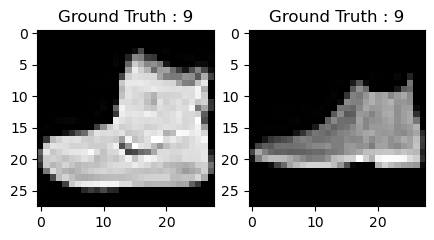

In [83]:
plt.figure(figsize=[5,5])

# Display the first image in training data
plt.subplot(121)
plt.imshow(train_X[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(train_Y[0]))

# Display the first image in testing data
plt.subplot(122)
plt.imshow(test_X[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(test_Y[0]))

Preprocess the Data

In [84]:
train_X = train_X.reshape(-1, 28,28, 1) #set each image to size of matrix 28*28*1
test_X = test_X.reshape(-1, 28,28, 1)
train_X.shape, test_X.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [85]:
#data is in integer 8 format, need to convert to float32
#rescale the pixel values to only be in range 0-1
train_X = train_X.astype('float32')
test_X = test_X.astype('float32')
train_X = train_X / 255. #normalise pixel values to be range 0-1
test_X = test_X / 255.

In [86]:
#convert the categories into a vector of numbers
#machine learning algorithms cant work with this data directly
#generate one boolean column for each category
#row vector 1*10, 10 categories

# Change the labels from categorical to one-hot encoding
train_Y_one_hot = to_categorical(train_Y)
test_Y_one_hot = to_categorical(test_Y)

# Display the change for category label using one-hot encoding
print('Original label:', train_Y[0])
print('After conversion to one-hot:', train_Y_one_hot[0])

Original label: 9
After conversion to one-hot: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [87]:
#split training data 
#random parameter, ensures a random split generated each time the code is run
from sklearn.model_selection import train_test_split
train_X,valid_X,train_label,valid_label = train_test_split(train_X, train_Y_one_hot, test_size=0.2, random_state=13)

In [88]:
train_X.shape,valid_X.shape,train_label.shape,valid_label.shape

((48000, 28, 28, 1), (12000, 28, 28, 1), (48000, 10), (12000, 10))

Model : Convolution, Pooling and Fully Connected Layer

In [89]:
batch_size = 64  #number of samples during training
epochs = 20 # number of times training is done
num_classes = 10 #number of classes in the dataset (we have 10 categories therefore 10)

In [91]:
fashion_model = Sequential()

#add the first convulutional layer
#kernel 3*3, linear activation function, 32 filters
fashion_model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',input_shape=(28,28,1),padding='same'))
#uses leaky relu, interesting, with learning rate 0.1
fashion_model.add(LeakyReLU(alpha=0.1))
#pooling layer, 2*2 matrix, max values
fashion_model.add(MaxPooling2D((2, 2),padding='same'))

#add the second convulutional layer
#64 layers, 3*3, linear function
fashion_model.add(Conv2D(64, (3, 3), activation='linear',padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))

#add the 3rd convulutional layer
#128 layers, 3*3 matrix, linear
fashion_model.add(Conv2D(128, (3, 3), activation='linear',padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))                  
fashion_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))

#flatten the vector for the fcl
fashion_model.add(Flatten())
#dense layer (fully-connected), uses linear, 128 layers
fashion_model.add(Dense(128, activation='linear'))
fashion_model.add(LeakyReLU(alpha=0.1))   

#dense final layer, uses number of classes, in this case 10
#uses softmax function to determine the probabilities
fashion_model.add(Dense(num_classes, activation='softmax'))

#common loss function used, dam optmizer, adapts learning rate during training
fashion_model.compile(loss=categorical_crossentropy, optimizer=Adam(),metrics=['accuracy'])

In [92]:
fashion_model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 leaky_re_lu_20 (LeakyReLU)  (None, 28, 28, 32)        0         
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 14, 14, 64)        18496     
                                                                 
 leaky_re_lu_21 (LeakyReLU)  (None, 14, 14, 64)        0         
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 7, 7, 64)         0         
 g2D)                                                 

Train the Model

In [94]:
#uses fit method, trains the model on the train x and train label data
#returns a History object, this contains the information such as loss and accuracy which we can graph
#batch size specifies the number of samples per gradient update
#epoch is the number of times the test is done
#validation data specifies the data on which to evaluate the loss and any model metrics at the end of each epoch
#evaluates the data against the valid data
fashion_train = fashion_model.fit(train_X, train_label, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_X, valid_label))

Epoch 1/20
750/750 [==============================] - 20s 27ms/step - loss: 0.3233 - accuracy: 0.8845 - val_loss: 0.2931 - val_accuracy: 0.8928
Epoch 2/20
750/750 [==============================] - 20s 27ms/step - loss: 0.2592 - accuracy: 0.9057 - val_loss: 0.2475 - val_accuracy: 0.9101
Epoch 3/20
750/750 [==============================] - 19s 26ms/step - loss: 0.2213 - accuracy: 0.9183 - val_loss: 0.2442 - val_accuracy: 0.9120
Epoch 4/20
750/750 [==============================] - 20s 26ms/step - loss: 0.1933 - accuracy: 0.9288 - val_loss: 0.2546 - val_accuracy: 0.9074
Epoch 5/20
750/750 [==============================] - 19s 25ms/step - loss: 0.1681 - accuracy: 0.9368 - val_loss: 0.2291 - val_accuracy: 0.9174
Epoch 6/20
750/750 [==============================] - 19s 26ms/step - loss: 0.1481 - accuracy: 0.9446 - val_loss: 0.2323 - val_accuracy: 0.9222
Epoch 7/20
750/750 [==============================] - 19s 26ms/step - loss: 0.1275 - accuracy: 0.9521 - val_loss: 0.2571 - val_accuracy: